<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/DAUP/blob/main/DUAP_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [ ]:
import pandas as pd
import os

file_path = '/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3'
csv_file = os.path.join(file_path, 'DailyDelhiClimateTrain.csv')

data = pd.read_csv(csv_file)

print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [ ]:

print(data.info())

print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
# Calculate mean, median, and standard deviation for numeric columns only
numeric_cols = data.select_dtypes(include=['number']).columns
mean_values = data[numeric_cols].mean()
median_values = data[numeric_cols].median()
std_values = data[numeric_cols].std()

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nStandard Deviation:\n", std_values)

Mean:
 meantemp          25.495521
humidity          60.771702
wind_speed         6.802209
meanpressure    1011.104548
dtype: float64

Median:
 meantemp          27.714286
humidity          62.625000
wind_speed         6.221667
meanpressure    1008.563492
dtype: float64

Standard Deviation:
 meantemp          7.348103
humidity         16.769652
wind_speed        4.561602
meanpressure    180.231668
dtype: float64


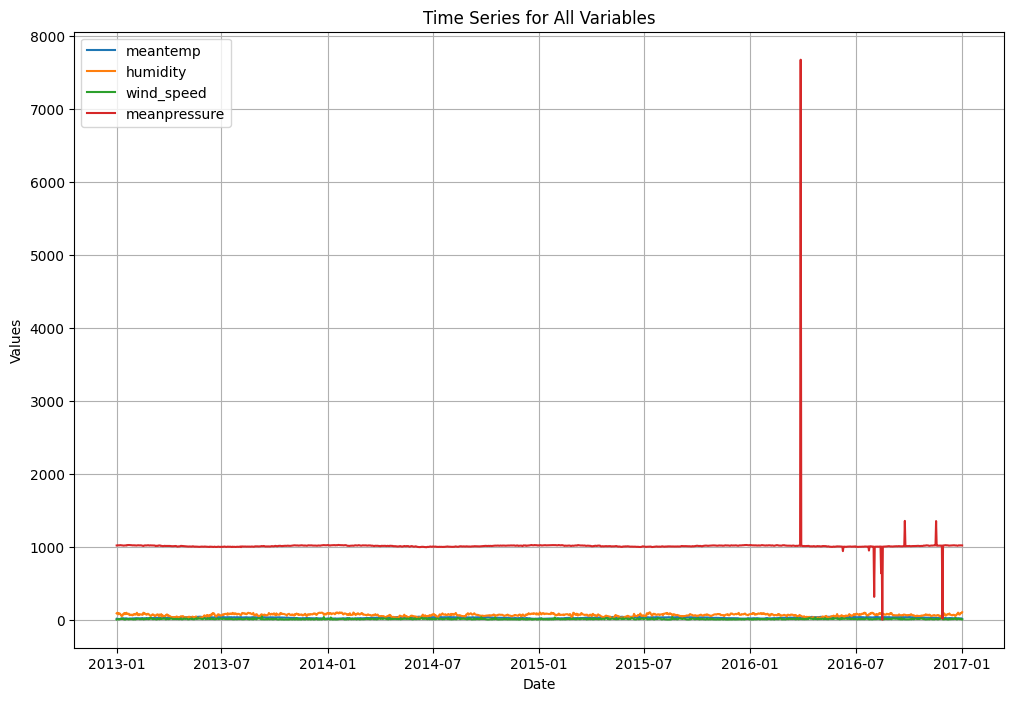

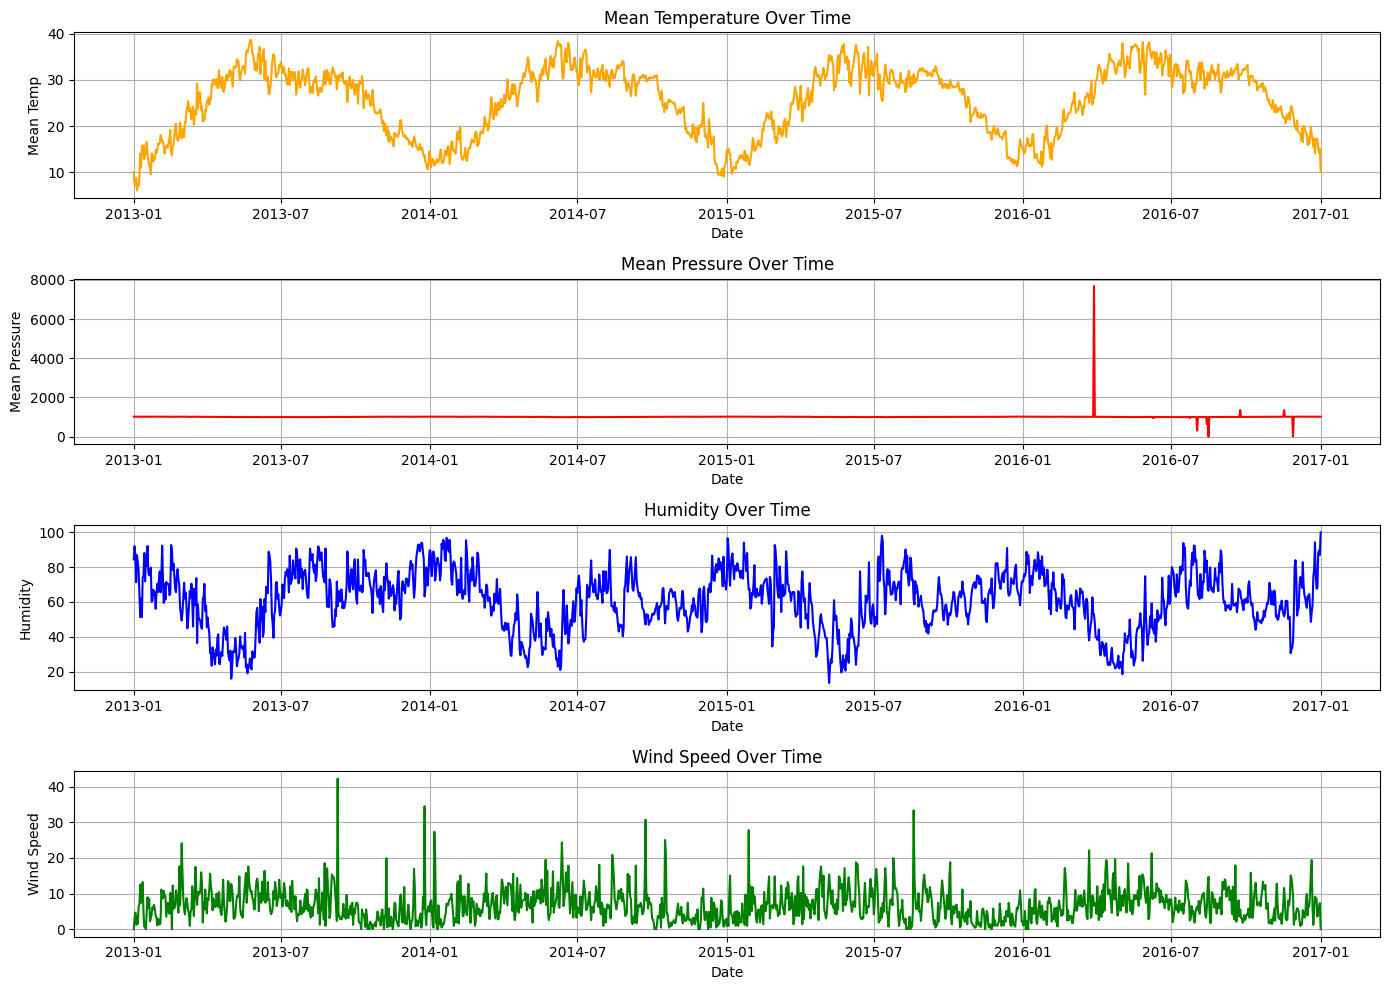

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the date column to datetime format if present
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

# Set the date as the index if applicable
if 'date' in data.columns:
    data.set_index('date', inplace=True)

# Plotting the time series for all variables
plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.title('Time Series for All Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Subplots for temperature and wind speed
plt.figure(figsize=(14, 10))

# Mean temperature subplot
plt.subplot(4, 1, 1)
# Changed 'mean_temp' to 'meantemp' to match the actual column name in the DataFrame
plt.plot(data.index, data['meantemp'], label='Mean Temperature', color='orange')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.grid(True)

# Max temperature subplot
plt.subplot(4, 1, 2)
plt.plot(data.index, data['meanpressure'], label='Mean Pressure', color='red')
plt.title('Mean Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Pressure')
plt.grid(True)


# Min temperature subplot
plt.subplot(4, 1, 3)
plt.plot(data.index, data['humidity'], label='Humidity', color='blue')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.grid(True)


# Wind speed subplot
plt.subplot(4, 1, 4)
# Changed 'wind_speed' to 'wind_speed' to match the actual column name
plt.plot(data.index, data['wind_speed'], label='Wind Speed', color='green')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.grid(True)

plt.tight_layout()
plt.show()

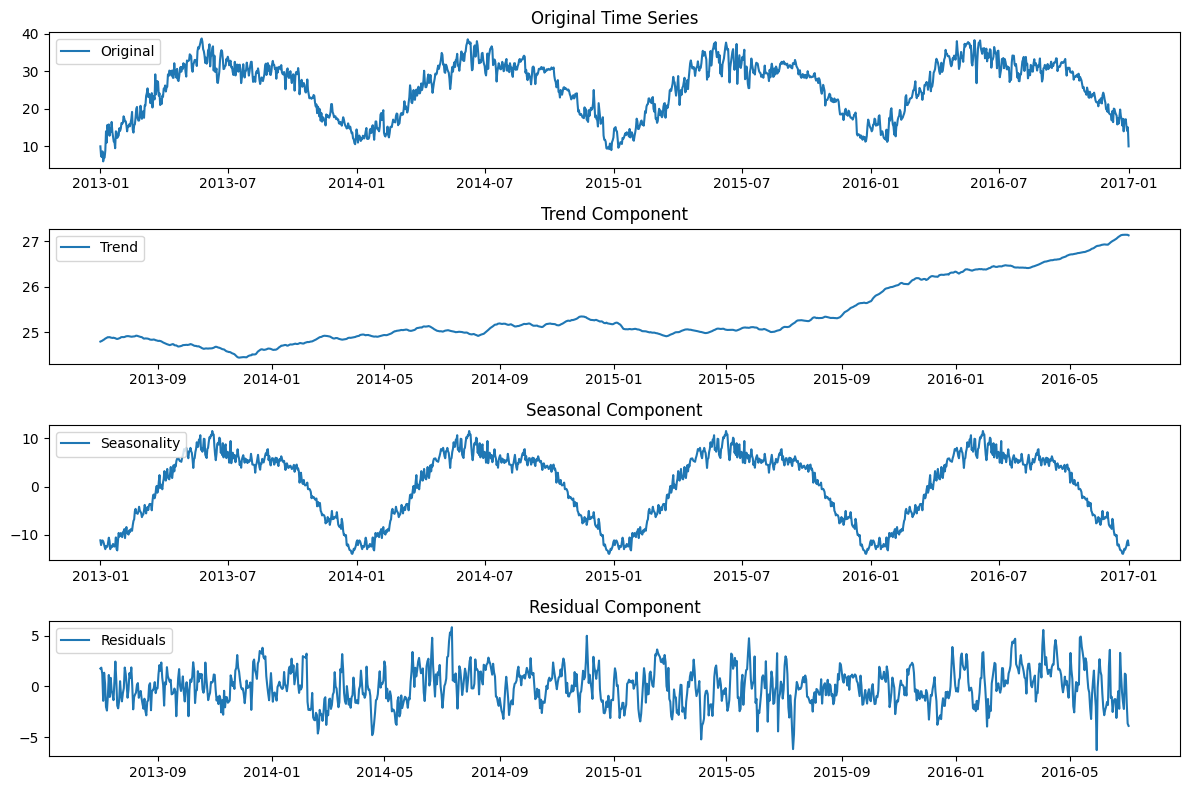

Seasonal Amplitude: 25.387704626932475


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

mean_temp_data = data['meantemp']

# Decompose the time series
decomposition = seasonal_decompose(mean_temp_data, model='additive', period=365) # Assuming yearly seasonality

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(mean_temp_data, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

seasonal_amplitude = seasonal.max() - seasonal.min()
print(f"Seasonal Amplitude: {seasonal_amplitude}")


## **Identify any seasonal patterns and discuss their significance.**

The seasonal component plot (plt.subplot(413)) reveals the recurring patterns within a year.  
Consistent peaks and troughs.  The peaks likely correspond to summer months, and troughs to winter months.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your pandas DataFrame and 'meantemp' is the target variable
X = data.drop('meantemp', axis=1)  # Features (all columns except 'meantemp')
y = data['meantemp']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # Important: Set shuffle=False for time series data

# Now you have X_train, X_test, y_train, and y_test for your model training and evaluation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1169, 3)
X_test shape: (293, 3)
y_train shape: (1169,)
y_test shape: (293,)


In [ ]:
# prompt: Fit Seasonal Decomposition of Time Series (STL) model to the training set.

from statsmodels.tsa.seasonal import STL

# Fit the STL model to the training data
stl_model = STL(y_train, period=365, robust=True) # Assuming yearly seasonality, adjust if needed
stl_results = stl_model.fit()

# Access the trend, seasonal, and residual components
trend_component = stl_results.trend
seasonal_component = stl_results.seasonal
residual_component = stl_results.resid

# You can now use these components for further analysis or forecasting
print("STL model fitted successfully.")

STL model fitted successfully.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'y_test' contains the actual values and 'y_pred' contains your model's predictions
# Replace 'y_pred' with your actual model predictions

# Example:  Let's assume a simple prediction – the mean of the training data.
y_pred = np.full(len(y_test), y_train.mean())


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 6.578031200515134
Root Mean Squared Error (RMSE): 7.340812730552024


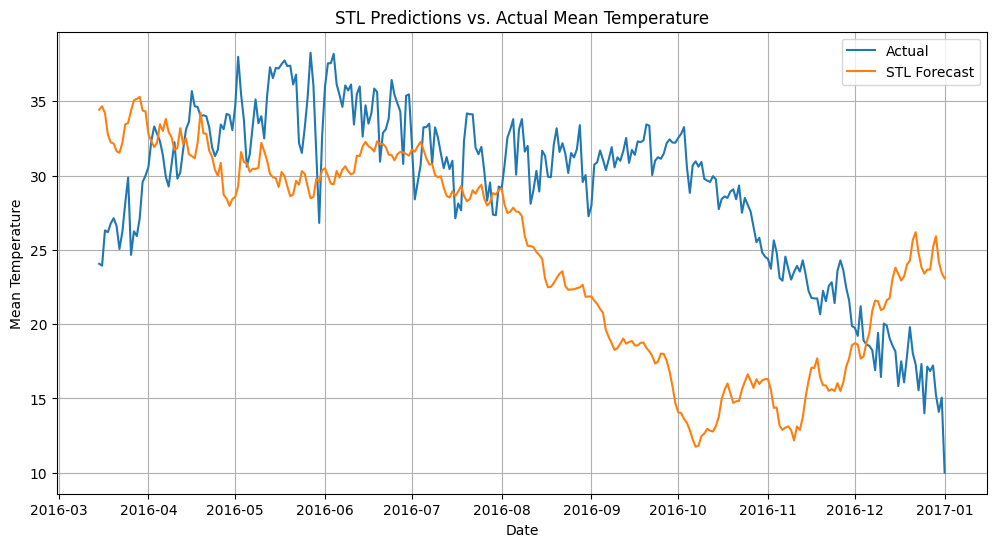

In [ ]:
# prompt: plot graph between STL predictions and actual predictions

# Plot the STL predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast[-len(test):], label='STL Forecast')
plt.title('STL Predictions vs. Actual Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA MAE: 7.390414854371277
ARIMA RMSE: 8.230701669960705


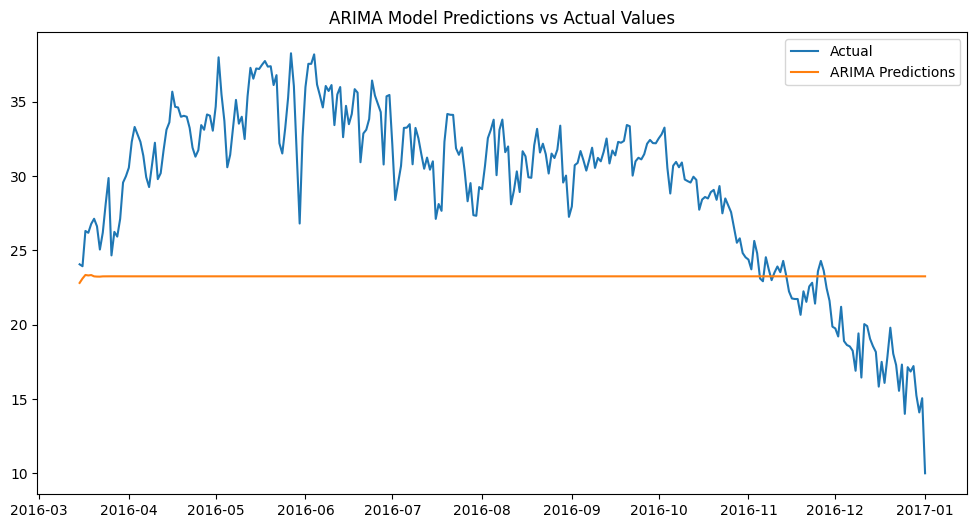

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model
mae_arima = mean_absolute_error(test, predictions)
rmse_arima = np.sqrt(mean_squared_error(test, predictions))

print(f"ARIMA MAE: {mae_arima}")
print(f"ARIMA RMSE: {rmse_arima}")

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Model Predictions vs Actual Values')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

timesteps = 1
# X_train and X_test are already NumPy arrays, so remove .values
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, X_train.shape[1]), return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

y_pred = model.predict(X_test_reshaped)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 423.8607
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.4740
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.5425
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.6889
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.0813
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.7258
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.0761
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.8717
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.3226
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.9971
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.4334
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.1949
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.1085
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.4160
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.6677
Epoch 16/50
37

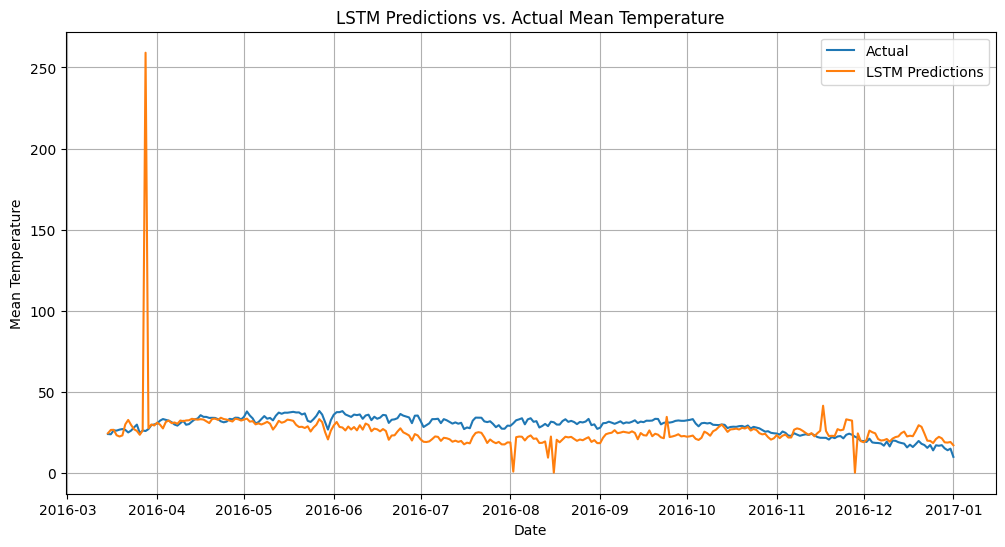

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='LSTM Predictions')
plt.title('LSTM Predictions vs. Actual Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()